# **IBM Data Science With Python Assignment**

### Author: Aravindan

### Date: 24-Aug-2024

#**Project Scenario:**

You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

* Is there a significant difference in the median value of houses bounded by the Charles river or not?

* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic.

# Overview of Project Tasks

**Final Project:** For the project scenario, here is an overview of your tasks. The following reading sections will provide you with detailed instructions for each task.

**Project Tasks:**

**Task 1:** Familiarize yourself with the dataset

**Task 2:** Generate basic statistics and visualizations for upper management.

**Task 3:** Use the appropriate tests to answer the questions provided.

**Task 4:** Share your Jupyter Notebook.

# **Data Dictionary**

The following describes the dataset variables:

| **Column Name** | **Description**                                                     |
|-----------------|---------------------------------------------------------------------|
| **CRIM**        | per capita crime rate by town                                       |
| **ZN**          | proportion of residential land zoned for lots over 25,000 sq.ft.    |
| **INDUS**       | proportion of non-retail business acres per town.                   |
| **CHAS**        | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| **NOX**         | nitric oxides concentration (parts per 10 million)                  |
| **RM**          | average number of rooms per dwelling|
| **AGE**         | proportion of owner-occupied units built prior to 1940|
| **DIS**         | weighted distances to five Boston employment centres|
| **RAD**         | index of accessibility to radial highways|
| **PTRATIO**     | pupil-teacher ratio by town|
| **LSAT**        | % lower status of the population|
| **MEDV**| Median value of owner-occupied homes in $1000's|
|**TAX**| Full-Value Property-Tax rate per USD 10k|

This data was modified for this course and the link to the complete dataset can be found in the [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) library

# **1. Import Necessarry Libraries**

In [33]:
# Basic Libraries

import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Libraries
import statsmodels.api as sm
import scipy.stats

# Set Display Options
%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)
pd.set_option('display.max_columns',None)
pd.set_option('display.width', 1000)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# **2. Load the Dataset**

In [34]:
# Load the dataset into a pandas dataframe
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [35]:
# Visualize the top 5 rows of the dataset
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#**3. Exploratory Data Analysis (EDA)**

In [36]:
# drop the unnamed:0 column as it is of no use
boston_df.drop(columns='Unnamed: 0', inplace=True)

In [37]:
# Information on the dataset
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [38]:
# Statistical description of the dataset
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#**Task 2a: For the "Median value of owner-occupied homes" provide a boxplot**

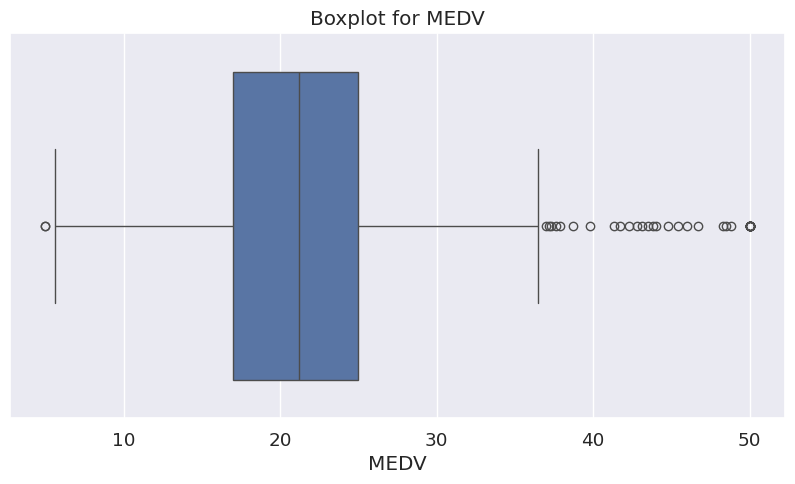

In [39]:
# Boxplot for the Median value of owner-occupied homes
plt.figure(figsize=(10,5))
sns.boxplot(data= boston_df, x='MEDV')
plt.title("Boxplot for MEDV")
plt.show()

There are some outliers present after the 3rd quartile

# **Task 2b: Provide a  bar plot for the Charles river variable**

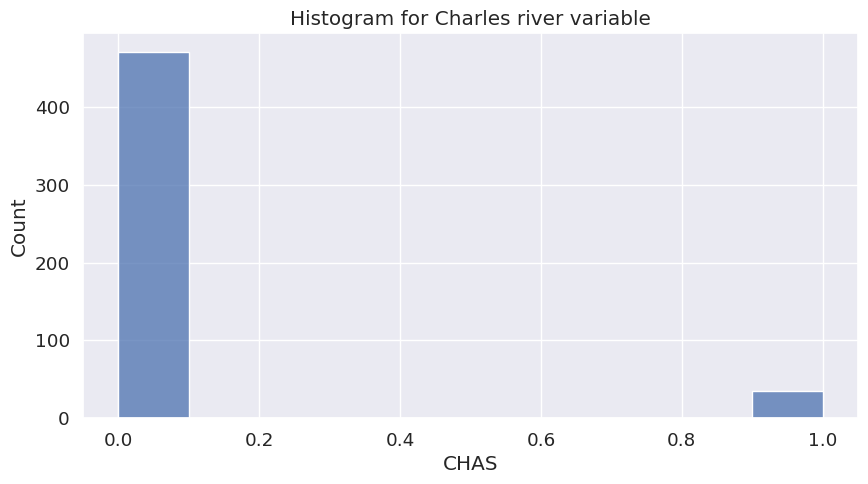

In [49]:
# Bar plot for the Charles river variable
plt.figure(figsize=(10,5))
sns.histplot(data=boston_df, x='CHAS',kde=False)
plt.title("Histogram for Charles river variable")
plt.show()

Majority of the houses are not near by Charles River

#**Task 2c: Provide a boxplot for the MEDV variable vs the AGE variable - Discretize the age variable into three groups of 35 years and younger, between 35 and 50 years and older**

In [41]:
# Discretization of Age variable
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

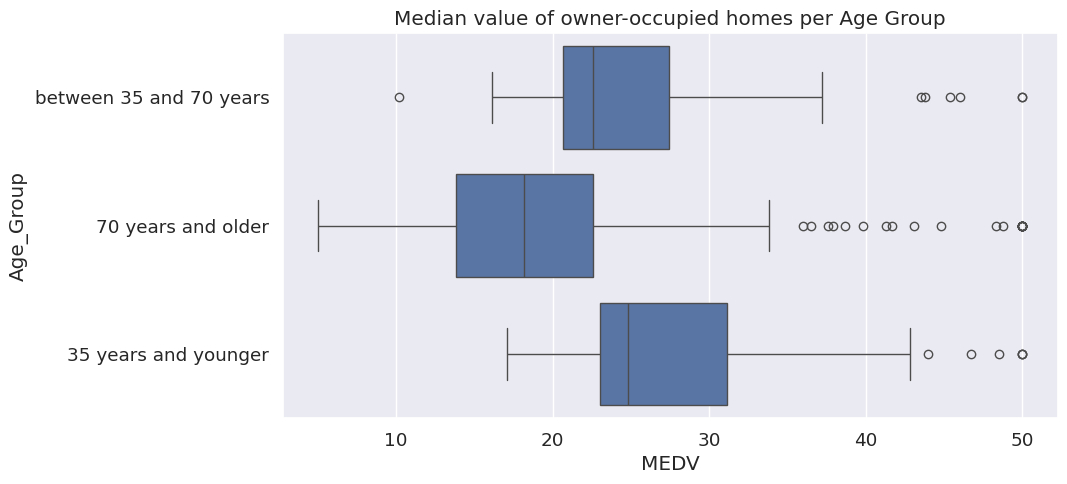

In [42]:
# Visualization of the MEDV vs. Age
plt.figure(figsize=(10,5))
sns.boxplot(data = boston_df, x = 'MEDV', y = 'Age_Group')
plt.title('Median value of owner-occupied homes per Age Group')
plt.show()

From the above box plot, 35 years or younger age group people pays the highest median house price while above 70 age group people are shifting to cheaper houses

# **Task 2d: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

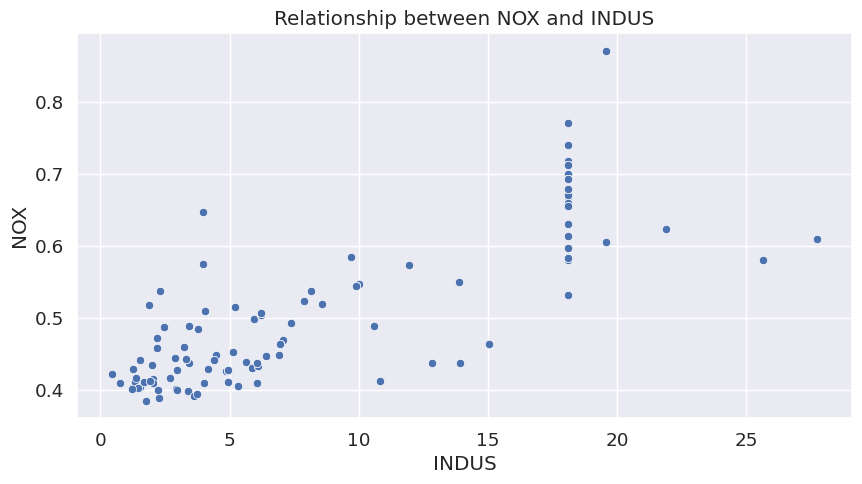

In [43]:
# Scatter plot to show relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
plt.figure(figsize=(10,5))
sns.scatterplot(data = boston_df, x = 'INDUS', y = 'NOX')
plt.title('Relationship between NOX and INDUS')
plt.show()

There is a positive linear relationship between NOX and INDUS

# **Task 2e: Create a histogram for the pupil to teacher ratio variable**

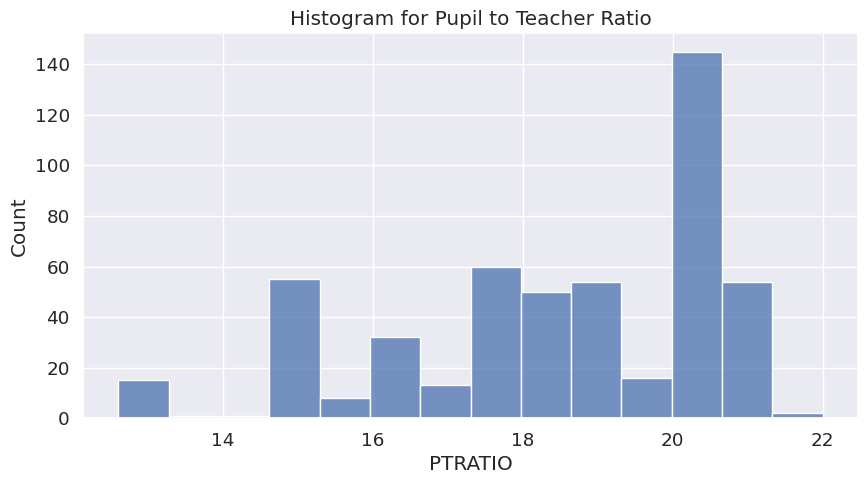

In [44]:
# Histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10,5))
sns.histplot(data= boston_df, x='PTRATIO', kde=False)
plt.title("Histogram for Pupil to Teacher Ratio")
plt.show()


The pupil to teacher ratio is normally distributed with the mean around 20.

#**Task 3a: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

#### **Hypothesis**

**Null Hypothesis (H0):** There is no difference in median value of houses bounded by the Charles river.

**Alternative Hypothesis (Ha):** There is a difference in median value of houses bounded by the Charles river.

**α** = 0.05

In [45]:
# T-test statistics for independent samples
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** Since the p-value (7.390623170519905e-05) is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river.

# **Task 3b: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

#### **Hypothesis**

**Null Hypothesis (H0):** There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

**Alternative Hypothesis (Ha):** There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

**α** = 0.05

In [46]:
# ANOVA Test statistics
thirtyfive_lower = boston_df[boston_df['Age_Group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F-Statistic={0}, P-value={1}".format(f_statistic,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


**Conclusion:**

Since the p-value (1.7105011022702984e-15) is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

# **Task 3c: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

#### **Hypothesis**
**Null Hypothesis (H0):** There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

**Alternative Hypothesis (Ha):** There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

**α** = 0.05

In [47]:
# Pearson Correlation Test statistics
pearson_coef, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson Coefficient: {0}, P-Value: {1}".format(pearson_coef,p_value))

Pearson Coefficient: 0.7636514469209151, P-Value: 7.913361061239527e-98


**Conclusion:**

Since the p-value (7.91336106123955e-98) is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

# **Task 3d: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

#### Hypothesis
**Null Hypothesis (H0):** There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

**Alternative Hypothesis (Ha):** There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

**α** = 0.05

In [48]:
# Regression Test statistics
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        08:15:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:**

Since the p-value is less than the alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistically significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.